### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

**independent variable = condition (congruent vs. incongruent) <br/>
dependent variable = participants response time in seconds**

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

H0: The population's mean response time (rpt) does not differ between congruent or incongruent word/color pairs. <br/>
**μ** $rpt_{incongruent}$ - **μ** $rpt_{congruent}$ =0 <br/>

H1: The population's mean response time (rpt) is significantly larger for incongruent word/color pairs compared to  congruent word/color pairs. <br/>
**μ** $rpt_{incongruent}$ - **μ** $rpt_{congruent}$ >0

(μ = population mean)

I choose a one-tailed, paired t-Test  
- one-tailed: my hypothesis specifies the direction of the difference as it is intuitive that incongruent word/color pairs would reduce rather than improve participants response time
- paired or dependent: this experiment followed a within subject design (every participant run through both conditions)
- t-Test: 
    - the aim is to compare the means of two related groups to investigate whether the difference between those means is statistically significant, 
    - the sample size is less than 30 and we do not know the population standard deviation (as we should know for the z-test), 
    - the response time is a continuous dependent variable, 
    - the response time should follow a normal distribution (which I have to check)

In [1]:
# Perform the analysis here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [3]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


The mean rpt for the incongruent condition was **22.02** with a standard devation of **4.80** and for the congruent condition **14.05** with a standard deviation of **3.56**.

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

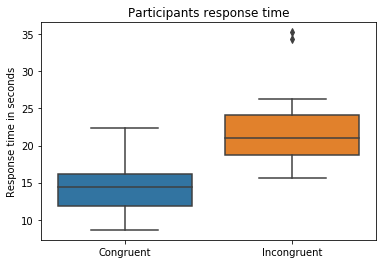

In [4]:
# boxplots
sns.boxplot(data=df)
plt.ylabel('Response time in seconds')
plt.title('Participants response time');

The mean response time differed between both conditions. While participants responded about 6-7 seconds faster in the congruent condition compared to the incongruent condition. There are two outliers in the incongruent condition. Their response time was much longer compared to the other participants. It might be that they have been distracted during the experiment. Thus, I will remove both.

In [5]:
# cleaning step - outlier 
df[df['Incongruent'] >30]

,Congruent,Incongruent
14,18.200,35.255
19,12.369,34.288


In [6]:
df.drop([14, 19],  inplace=True)

In [7]:
# checking the cleaning step
df[df['Incongruent'] >30]

,Congruent,Incongruent


In [8]:
df.describe()

,Congruent,Incongruent
count,22.000000,22.000000
mean,13.939000,20.856318
std,3.592773,2.876923
min,8.630000,15.687000
25%,11.527750,18.668250
50%,14.356500,20.820000
75%,15.827500,22.641750
max,22.328000,26.282000


After dropping the outliers, the mean rpt for the incongruent condition was **20.86** with a standard devation of **2.88** and for the congruent condition **13.94** with a standard deviation of **3.59**.

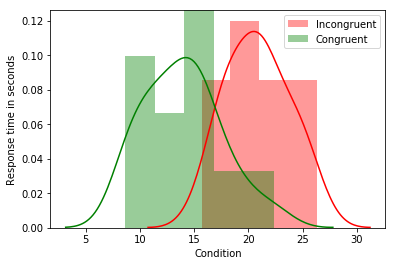

In [9]:
sns.distplot( df['Incongruent'] , color="red", label='Incongruent')
sns.distplot( df['Congruent'] , color="green", label='Congruent')
plt.legend()
plt.ylabel('Response time in seconds')
plt.xlabel('Condition');

Both distributions look a bit skewed to the right. Therefore, I compute a test of normal distribution in the next step.

In [10]:
import scipy.stats
scipy.stats.normaltest(df['Congruent'])

NormaltestResult(statistic=1.053454992470052, pvalue=0.59053433686655943)

In [11]:
scipy.stats.normaltest(df['Incongruent'])

NormaltestResult(statistic=0.91684919005708487, pvalue=0.63227895670370593)

The data does follow a normal distribution.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [12]:
# degrees of freedom 
dof = df.shape[0]-1 
dof

21

In [13]:
# critical t-value for an alpha of 5%  and 21 degrees of freedom (one-tailed)
scipy.stats.t.ppf(.95, dof)

1.7207429028118775

checking the result with this [t-table](http://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf) (1.721)

In [14]:
# point estimate (pe) of the difference of the means
pe = np.mean(df['Incongruent'])-np.mean(df['Congruent'])
pe

6.9173181818181817

In [15]:
# creating a difference column
df['Difference']= df['Incongruent']-df['Congruent']

In [16]:
df.head()

,Congruent,Incongruent,Difference
0,12.079,19.278,7.199
1,16.791,18.741,1.950
2,9.564,21.214,11.650
3,8.630,15.687,7.057
4,14.669,22.803,8.134


In [17]:
# calculating the standard deviation
std = df['Difference'].std(axis=0)
std

3.4005616256921249

In [18]:
import math
# calculating the t-statistic 
pe/(std / math.sqrt(df.shape[0]))

9.5410999084921801

In [19]:
# calculating the t-statistic with the built in function to verify the former result
scipy.stats.ttest_rel(df['Incongruent'], df['Congruent'])

Ttest_relResult(statistic=9.5410999084921784, pvalue=4.3818916259231317e-09)

The t-statistic of **9.541** is greater than the critical value of **1.721**. </b>
Thus, we can reject the null hypothesis. **Participants needed more time to respond when word/color pairs were incongruent compared to congruent word/color pairs.**

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

There are different possible explanations. Some researchers argue, that recognizing words is an automatic process which takes attantional resources required for recognizing colors (as it is not considered as an automatic process, it proceeds after the automatic word recognition, resulting in a larger response time).
Alternative or similar tasks are the reversed stroop effect, emotional stroop effect or numerical stroop effect.

**References** <br/>
https://python-graph-gallery.com/25-histogram-with-several-variables-seaborn/ <br/>
http://www.psych.utoronto.ca/courses/c1/chap7/chap7b.html <br/>
http://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/t-score-vs-z-score/ <br/>
http://www.statisticssolutions.com/manova-analysis-paired-sample-t-test/<br/>
https://stackoverflow.com/questions/25692293/inserting-a-link-to-a-webpage-in-an-ipython-notebook

In [20]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Test a Perceptual Phenomenon.ipynb'])

0